# Introdução ao Scikit-learn

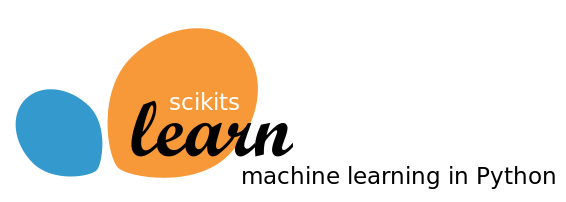

O scikit-learn é uma poderosa ferramenta para aprendizado de máquina em python de código aberto (open source) e pode ser usado comercialmente (licença BSD). Construído sobre as bibliotecas NumPy, SciPy e matplotlib, possui ferramentas simples e eficientes para mineração e análise de dados, sendo uma biblioteca acessível e reutilizável em vários contextos.

#### O scikit-learn requer python (> = 3.5)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
pokemon_data = pd.read_csv('../../scr/datasets/pokemon.csv')
pokemon_data = pokemon_data.dropna()

In [3]:
pokemon_data.columns

Index(['name', 'japanese_name', 'abilities', 'type1', 'against_bug',
       'against_dark', 'against_dragon', 'against_electric', 'against_fairy',
       'against_fight', 'against_fire', 'against_flying', 'against_ghost',
       'against_grass', 'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock', 'against_steel',
       'against_water', 'attack', 'base_egg_steps', 'base_happiness',
       'base_total', 'capture_rate', 'defense', 'experience_growth',
       'height_m', 'hp', 'percentage_male', 'pokedex_number', 'sp_attack',
       'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

In [4]:
pokemon_tipos = pokemon_data.type1.unique()

In [5]:
print("Proporção de pokemons do tipo: ")
for pokemon_tipo in pokemon_tipos:
    filtro_tipo = pokemon_data[pokemon_data["type1"] == pokemon_tipo]
    total_tipo = len(filtro_tipo["type1"])
    total = len(pokemon_data["type1"])
    
    print(f"\n\t- {pokemon_tipo.title()}: {total_tipo/total}")

Proporção de pokemons do tipo: 

	- Grass: 0.1067251461988304

	- Fire: 0.06725146198830409

	- Water: 0.15350877192982457

	- Bug: 0.09941520467836257

	- Normal: 0.13450292397660818

	- Poison: 0.043859649122807015

	- Electric: 0.04093567251461988

	- Fairy: 0.024853801169590642

	- Fighting: 0.04093567251461988

	- Psychic: 0.05263157894736842

	- Ghost: 0.03654970760233918

	- Rock: 0.04824561403508772

	- Ground: 0.03216374269005848

	- Ice: 0.029239766081871343

	- Dragon: 0.03216374269005848

	- Dark: 0.038011695906432746

	- Steel: 0.014619883040935672

	- Flying: 0.0043859649122807015


## Treino e Teste

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
explicativa = pokemon_data[pokemon_data.columns.values[5:]]
resposta = pokemon_data["type1"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(explicativa, 
                                                    resposta, 
                                                    test_size=0.3, 
                                                    stratify=resposta)

In [9]:
X_train.head()

,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
403,1.0,1.0,0.5,1.0,1.00,1.0,0.5,1.0,1.00,2.0,...,0.9,60,50.0,404,60,49,60,30.5,4,0
231,1.0,1.0,0.0,1.0,1.00,1.0,1.0,1.0,2.00,1.0,...,1.1,90,50.0,232,60,60,50,120.0,2,0
450,1.0,1.0,1.0,0.5,0.25,2.0,2.0,1.0,0.25,1.0,...,0.8,40,50.0,451,30,55,65,12.0,4,0
576,2.0,1.0,1.0,1.0,0.50,1.0,1.0,2.0,1.00,1.0,...,0.3,45,50.0,577,105,50,20,1.0,5,0
429,0.5,1.0,2.0,2.0,1.00,1.0,1.0,0.5,0.50,0.0,...,0.9,100,50.0,430,105,52,71,27.3,4,0


In [10]:
X_test.head()

,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
127,1.0,1.0,1.0,1.0,2.00,1.0,1.0,0.0,1.00,1.0,...,1.4,75,100.0,128,40,70,110,88.4,1,0
430,1.0,1.0,1.0,1.0,2.00,1.0,1.0,0.0,1.00,1.0,...,0.5,49,24.6,431,42,37,85,3.9,4,0
613,1.0,1.0,1.0,1.0,2.00,2.0,1.0,1.0,1.00,1.0,...,2.6,95,50.0,614,70,80,50,260.0,5,0
165,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,0.25,0.0,...,1.4,55,50.0,166,55,110,85,35.6,2,0
156,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,0.50,2.0,...,1.7,78,88.1,157,109,85,100,79.5,2,0


In [11]:
y_train.head()

403    electric
231      ground
450      poison
576     psychic
429        dark
Name: type1, dtype: object

In [12]:
y_test.head()

127    normal
430    normal
613       ice
165       bug
156      fire
Name: type1, dtype: object

Verificando se as propoções permanacem iguais.

In [13]:
print("Proporção de pokemons do tipo: ")
for pokemon_tipo in pokemon_tipos:
    filtro_tipo = y_train[y_train == pokemon_tipo]
    total_tipo = len(filtro_tipo)
    total = len(y_train)
    
    print(f"\n\t- {pokemon_tipo.title()}: {total_tipo/total}")

Proporção de pokemons do tipo: 

	- Grass: 0.10669456066945607

	- Fire: 0.06694560669456066

	- Water: 0.15271966527196654

	- Bug: 0.100418410041841

	- Normal: 0.13389121338912133

	- Poison: 0.043933054393305436

	- Electric: 0.04184100418410042

	- Fairy: 0.02510460251046025

	- Fighting: 0.04184100418410042

	- Psychic: 0.05230125523012552

	- Ghost: 0.03765690376569038

	- Rock: 0.04811715481171548

	- Ground: 0.03138075313807531

	- Ice: 0.029288702928870293

	- Dragon: 0.03138075313807531

	- Dark: 0.03765690376569038

	- Steel: 0.014644351464435146

	- Flying: 0.0041841004184100415


## Modelos

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [15]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.2621359223300971

In [16]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.1553398058252427

In [17]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9174757281553398

## Avaliação do modelo

### Matriz de confusão

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
random_florest = RandomForestClassifier(n_estimators=40).fit(X_train, y_train)
y_pred = random_florest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,6,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0


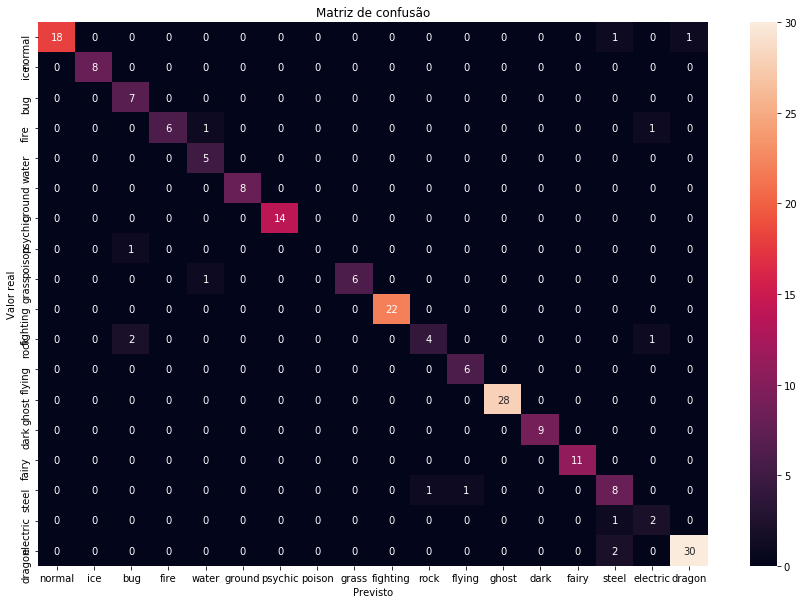

In [20]:
plt.figure(figsize=(15, 10))
ax = plt.subplot()

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Previsto');ax.set_ylabel('Valor real'); 
ax.set_title('Matriz de confusão'); 
ax.xaxis.set_ticklabels(y_test.unique()); ax.yaxis.set_ticklabels(y_test.unique());
plt.show()

## Kfold e Kfold Estratificado

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [22]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [23]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(explicativa, resposta):
    
    X_train = explicativa.iloc()[train_index].values
    X_test = explicativa.iloc()[test_index].values
    y_train = resposta.iloc()[train_index].dropna()
    y_test = resposta.iloc()[test_index].dropna()

    logistic_regression = LogisticRegression(solver='liblinear',multi_class='ovr')
    svc = SVC(gamma='auto')
    random_florest = RandomForestClassifier(n_estimators=40)
    
    scores_logistic.append(get_score(logistic_regression, X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(svc, X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(random_florest, X_train, X_test, y_train, y_test))

In [24]:
from statistics import mean

In [25]:
mean(scores_logistic)

0.1617243919334087

In [26]:
mean(scores_svm)

0.15058994696261543

In [27]:
mean(scores_rf)

0.8652290025520881

## Cross-Validation

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), 
                explicativa, 
                resposta,cv=3)

array([0.16170213, 0.23788546, 0.08558559])

In [30]:
cross_val_score(SVC(gamma='auto'), 
                explicativa, 
                resposta,cv=3)

array([0.14893617, 0.15418502, 0.14864865])

In [31]:
cross_val_score(RandomForestClassifier(n_estimators=40), 
                explicativa, 
                resposta,cv=3)

array([0.90638298, 0.83700441, 0.84684685])